In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport  # Importa ProfileReport desde ydata-profiling
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import RocCurveDisplay  # Nueva importación para ROC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings("ignore")

# Configuración para mostrar gráficos dentro del notebook
%matplotlib inline


In [2]:
dataM = pd.read_csv("https://raw.githubusercontent.com/salsaimon/proyecto_salud/main/dataM.csv", sep=",",encoding = 'utf-8')
dataM

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,1,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,1,5,30,30,1,9,4,8
3,0,1,0,27,0,0,0,1,0,0,2,0,0,0,11,3,6
4,0,1,1,24,0,0,0,1,0,0,2,3,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,0,1,1,45,0,0,0,0,0,0,3,0,5,0,5,6,7
229470,1,1,1,18,0,0,0,0,0,0,4,0,0,1,11,2,4
229471,0,0,0,28,0,0,0,1,0,0,1,0,0,0,2,5,2
229472,0,1,0,23,0,0,0,0,0,0,3,0,0,0,7,5,1


In [3]:
X=dataM.drop("Diabetes_binary",axis=1)
Y=dataM["Diabetes_binary"]

In [4]:
#Submuestreo
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [5]:
nm = NearMiss(version = 1 , n_neighbors = 10)
x_sm,y_sm= nm.fit_resample(X,Y)

In [6]:
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [7]:
y_sm.value_counts()

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64

In [8]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

Escalado

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

MODELOS

Regresion Logistica

In [10]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [11]:
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8511
Test set score: 0.8472


In [12]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error: 0.15276128970986277
Root Mean Squared Error : 0.39084688780884874


In [13]:
matrix = classification_report(Y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059



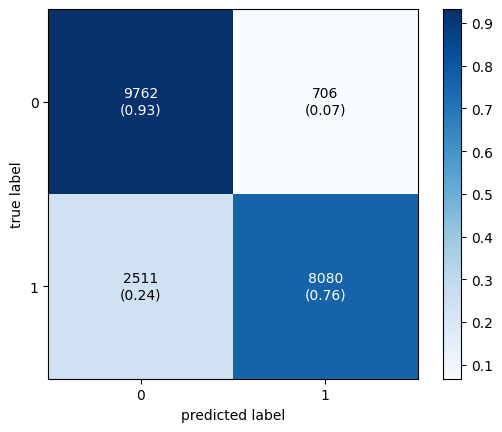

In [14]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Arboles de Decision

In [15]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [16]:
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8657
Test set score: 0.8479


In [17]:
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1520964908115295
Root Mean Squared Error : 0.3899955010144726


In [18]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10468
           1       0.95      0.74      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059



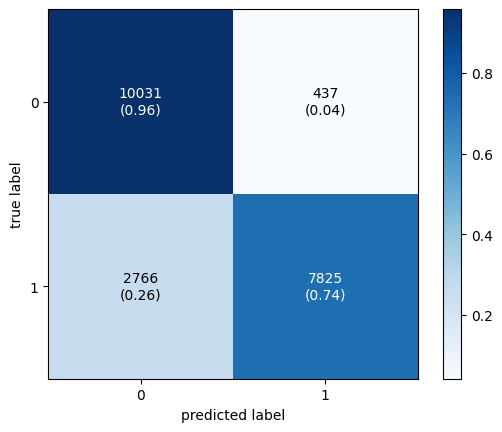

In [19]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8422
Test set score: 0.8049


In [22]:
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.19507099102521488
Root Mean Squared Error : 0.44166841750935154


In [23]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10468
           1       0.93      0.66      0.77     10591

    accuracy                           0.80     21059
   macro avg       0.83      0.81      0.80     21059
weighted avg       0.83      0.80      0.80     21059



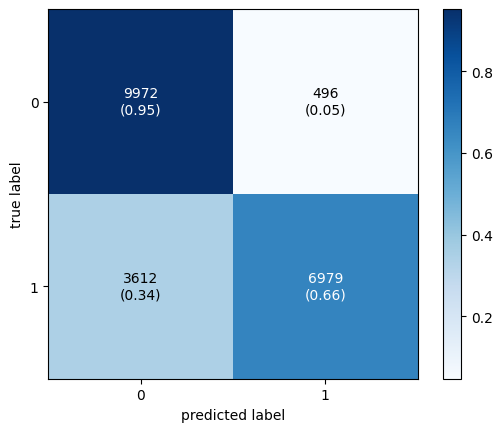

In [24]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Random Forest

In [25]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [26]:
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8713
Test set score: 0.8588


In [27]:
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14117479462462604
Root Mean Squared Error : 0.375732344395084


In [28]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10468
           1       0.94      0.77      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



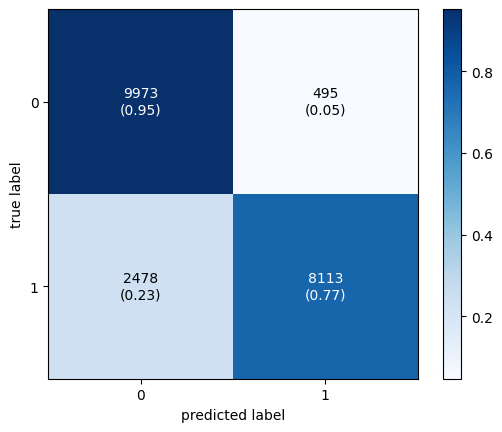

In [29]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Epoch 1/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8190 - loss: 0.3972 - val_accuracy: 0.8584 - val_loss: 0.3241
Epoch 2/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8650 - loss: 0.3184 - val_accuracy: 0.8622 - val_loss: 0.3148
Epoch 3/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.3063 - val_accuracy: 0.8651 - val_loss: 0.3158
Epoch 4/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8728 - loss: 0.2990 - val_accuracy: 0.8702 - val_loss: 0.3048
Epoch 5/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8712 - loss: 0.2996 - val_accuracy: 0.8682 - val_loss: 0.3039
Epoch 6/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8739 - loss: 0.2958 - val_accuracy: 0.8678 - val_loss: 0.3042
Epoch 7/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8733 - loss: 0.2972 - val_accuracy: 0.8681 - val_loss: 0.3022
Epoch 8/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8747 - loss: 0.2931 - 

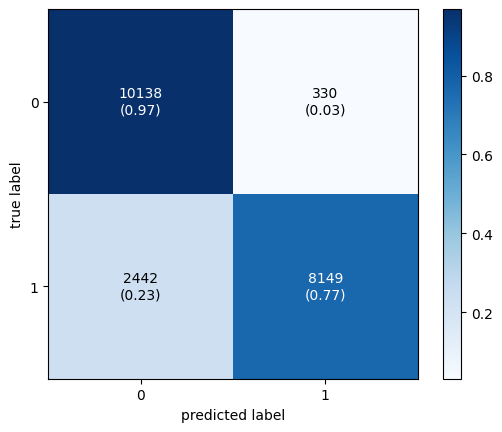

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predecir y generar reporte de clasificación
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Imprimir el reporte de clasificación
print(classification_report(Y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.show()


In [31]:
!pip install keras-tuner


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner import Hyperband

# Definir la función de construcción del modelo
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    
    # Añadir una segunda capa oculta con búsqueda de hiperparámetros
    model.add(Dense(hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    # Configurar la tasa de aprendizaje como un hiperparámetro
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model


In [33]:
from kerastuner.tuners import Hyperband

# Inicializar el sintonizador con el modelo y el espacio de hiperparámetros
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='tune_nn'
)


In [34]:
tuner.search(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=32)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Mejor número de neuronas en la primera capa oculta: {best_hps.get('units1')}")
print(f"Mejor número de neuronas en la segunda capa oculta: {best_hps.get('units2')}")
print(f"Mejor tasa de aprendizaje: {best_hps.get('learning_rate')}")


Trial 30 Complete [00h 00m 37s]
val_accuracy: 0.8650932908058167

Best val_accuracy So Far: 0.8723586201667786
Total elapsed time: 00h 07m 42s
Mejor número de neuronas en la primera capa oculta: 96
Mejor número de neuronas en la segunda capa oculta: 16
Mejor tasa de aprendizaje: 0.01


In [35]:
# Construir el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=32)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Precisión del mejor modelo en el set de prueba: {accuracy}")


Epoch 1/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8379 - loss: 0.3599 - val_accuracy: 0.8541 - val_loss: 0.3389
Epoch 2/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3142 - val_accuracy: 0.8644 - val_loss: 0.3107
Epoch 3/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8694 - loss: 0.3038 - val_accuracy: 0.8646 - val_loss: 0.3112
Epoch 4/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8732 - loss: 0.2996 - val_accuracy: 0.8659 - val_loss: 0.3072
Epoch 5/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3031 - val_accuracy: 0.8678 - val_loss: 0.3029
Epoch 6/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.2973 - val_accuracy: 0.8643 - val_loss: 0.3133
Epoch 7/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.2989 - val_accuracy: 0.8681 - val_loss: 0.3025
Epoch 8/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8774 - loss: 0.2911 - 